## World Happiness Report!

Six measurements are taken per country to explore what makes the world happy.

* GDP per capita
* Social support     
* Healthy life expectancy    
* Freedom to make life choices    
* Generosity    
* Perceptions of corruption

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_2017 = pd.read_csv('data/world_happiness_report/2017.csv')
df_2018 = pd.read_csv('data/world_happiness_report/2018.csv')
df_2019 = pd.read_csv('data/world_happiness_report/2019.csv')
df_2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Rename column

In [14]:
# rename column for easier processing
df_2019.rename(columns={"Country or region": "Country"}, inplace=True)
df_2019.head(2)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


### Get the list of columns

In [15]:
df_2019.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

### Let's check if there is any missing data

In [16]:
print("Do We Have Missing Data? :",df_2019.isnull().any().any())
print(df_2019.isnull().sum())

Do We Have Missing Data? : False
Overall rank                    0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


#### Good News! There is no missing data in our dataset

### Now let's see how many countries were included in the report

In [6]:
print("Number of countries in dataset is: ", len(df_2019["Country"].unique()))
df_2019["Country"].unique() 

Number of countries in dataset is:  156


array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

### What are the top 10 happiest regions of the world in 2019?
(Dataset is already in sorted order)

In [18]:
df_2019.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Which are the 10 least happiest countries of the world in 2019?

In [20]:
df_2019.tail(10)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


#### How is Germany doing?

In [9]:
df_2019.loc[df_2019['Country']=='Germany']

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265


#### Highlighting the maixmum values of each attribute in the data set

In [10]:
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df_2019.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


### Let's visualize some data

#### Top 10 countries for each attribute

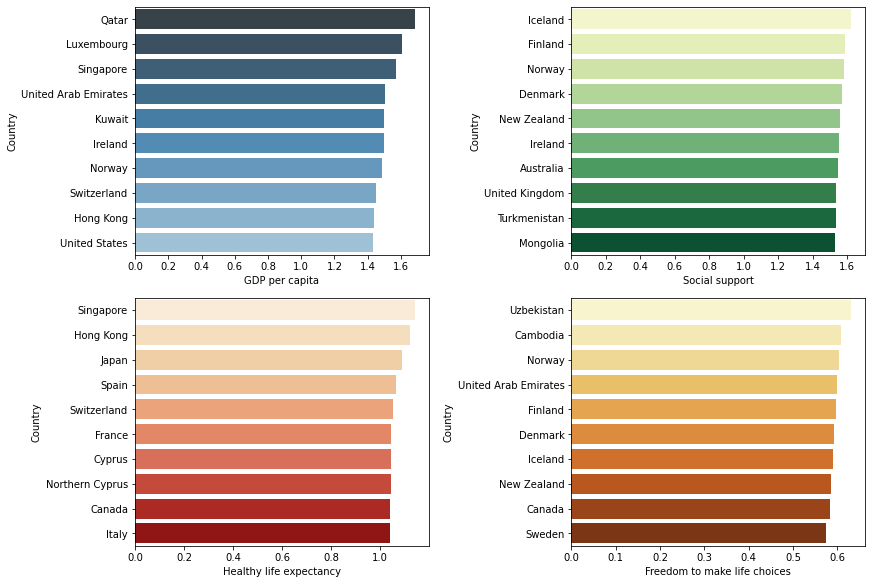

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country',data=df_2019.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country',data=df_2019.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country',data=df_2019.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country',data=df_2019.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

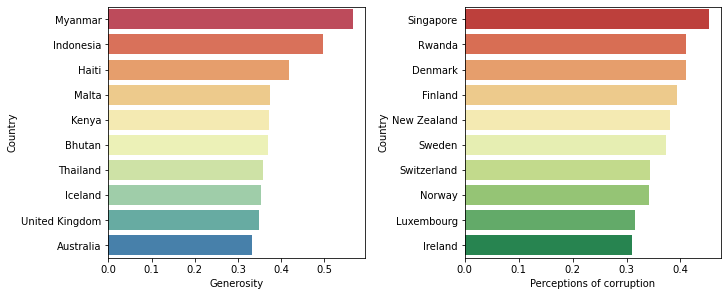

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=df_2019.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country',data=df_2019.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

#### Lets consider Economy(monetary),Social Support(family) and Health as primary concerns for an individual living in a country. Check how these factor distributions are changing over the years.

In [13]:
df_2019.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

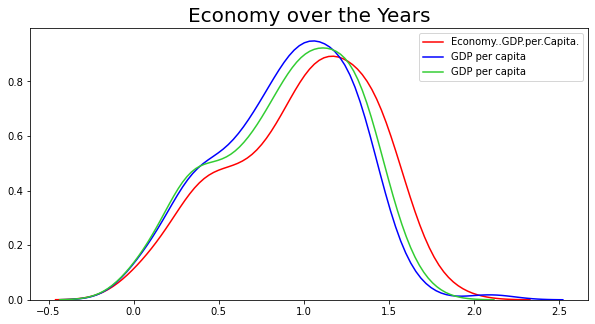

In [14]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_2017['Economy..GDP.per.Capita.'],color='red')
sns.kdeplot(df_2018['GDP per capita'],color='blue')
sns.kdeplot(df_2019['GDP per capita'],color='limegreen')
plt.title('Economy over the Years',size=20)
plt.show()

#### Calculate correlation matrixes of the Spearman kind.
A correlation matrix is a table showing correlation coefficients between variables. 
Each cell in the table shows the correlation between two variables.

In [15]:
spearman_cormatrix= df_2019.corr(method='spearman')
spearman_cormatrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999999,-0.814430,-0.816125,-0.807279,-0.552014,-0.070484,-0.217240
Score,-0.999999,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,-0.814430,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,-0.816125,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,-0.807279,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,-0.552014,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,-0.070484,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,-0.217240,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


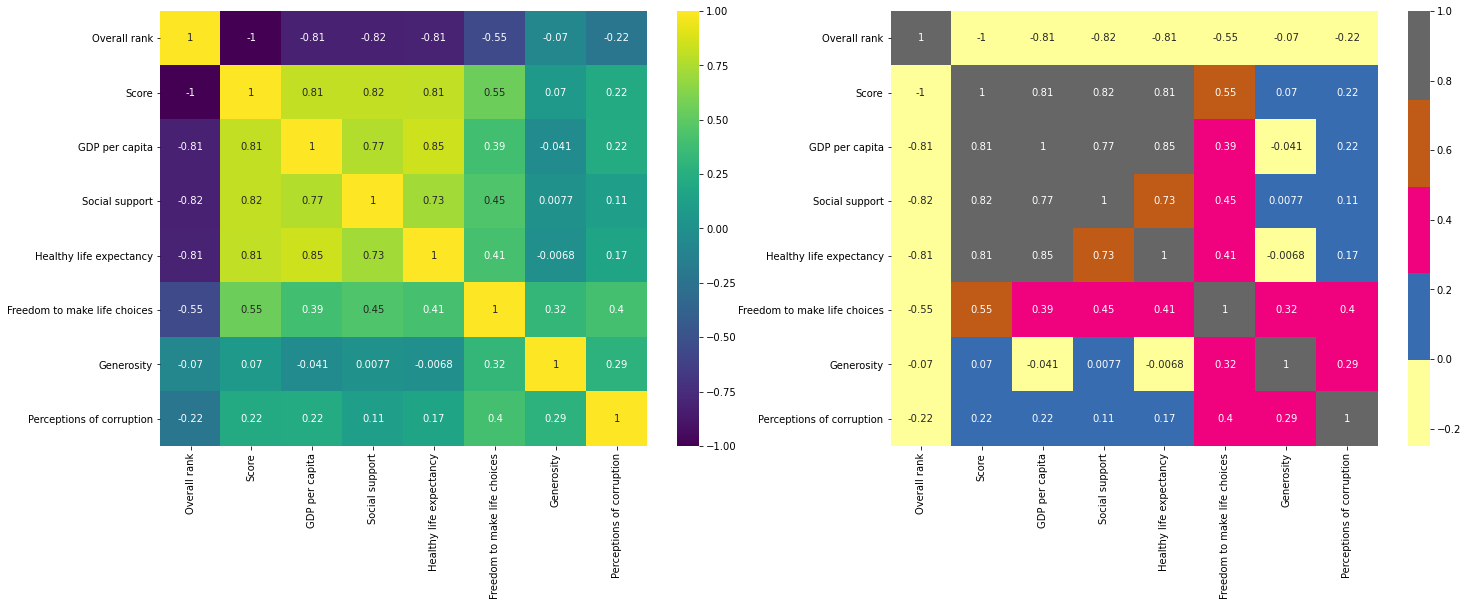

In [16]:
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

It looks like GDP, Family, and Life Expectancy are strongly correlated with the Happiness score. Freedom correlates quite well with the Happiness score, however, Freedom correlates quite well with all data. Trust in Government has a relatively mediocre correlation with the Happiness score.

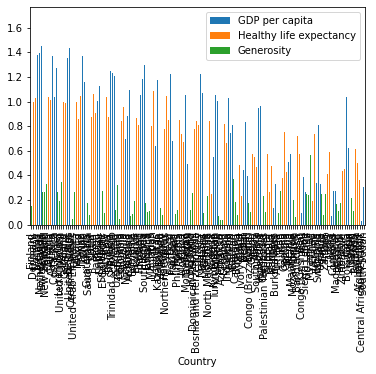

In [17]:
df_2019.plot(x="Country", y=["GDP per capita", "Healthy life expectancy", "Generosity"], kind="bar")
plt.show()